In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/delivery_time.csv')
dataset.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


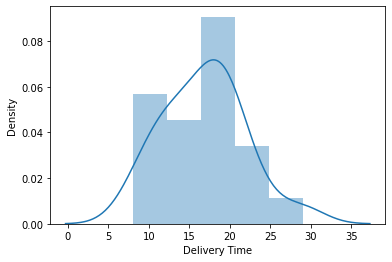

In [4]:
sns.distplot(dataset['Delivery Time'])

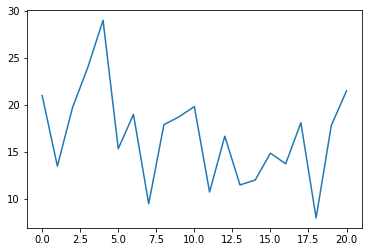

In [6]:
plt.plot(dataset['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


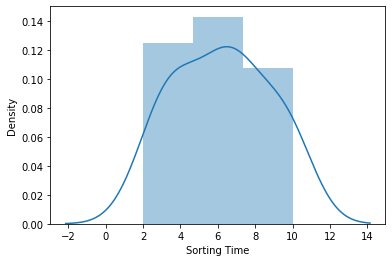

In [8]:
sns.distplot(dataset['Sorting Time'])

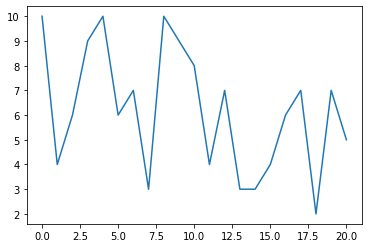

In [9]:
plt.plot(dataset['Sorting Time'])

In [34]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset.head(10)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


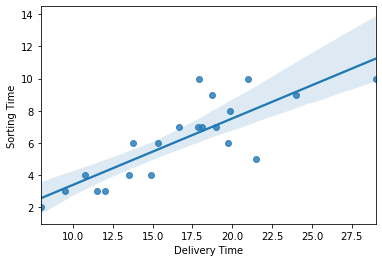

In [12]:
sns.regplot(x=dataset['Delivery Time'], y=dataset['Sorting Time'])

In [35]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [37]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [40]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [41]:
new_data=dataset

In [54]:
pred_data=new_data.iloc[:,1]

In [58]:
pred_data.head(5)

0    10
1     4
2     6
3     9
4    10
Name: sorting_time, dtype: int64

In [59]:
model.predict(pred_data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64